## Import and characterize the input data

In [1]:
# Import dependencies.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

In [2]:
# Import the input dataset.
charity_df = pd.read_csv('data/charity_data.csv')
charity_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
# Check the shape of the DataFrame
charity_df.shape

(34299, 12)

In [4]:
# Check the datadtypes
charity_df.dtypes

EIN                        int64
NAME                      object
APPLICATION_TYPE          object
AFFILIATION               object
CLASSIFICATION            object
USE_CASE                  object
ORGANIZATION              object
STATUS                     int64
INCOME_AMT                object
SPECIAL_CONSIDERATIONS    object
ASK_AMT                    int64
IS_SUCCESSFUL              int64
dtype: object

In [5]:
# Drop the input data that is not needed
charity_df = charity_df.drop(['EIN', 'NAME'], axis=1)
charity_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [6]:
# Generate our categorical variable list
charity_cat = charity_df.dtypes[charity_df.dtypes == "object"].index.tolist()
charity_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [7]:
# Length of categorical variable list (charity_cat)
len(charity_cat)

7

In [8]:
# Check the number of unique values in each column
charity_df[charity_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [9]:
# Print out the APPLICATION_TYPE value counts
appType_counts = charity_df["APPLICATION_TYPE"].value_counts()
appType_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

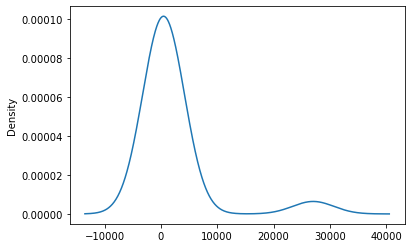

In [10]:
# Visualize the value counts
appType_counts.plot.density()

In [11]:
# Print out the AFFILIATION value counts
affiliation_counts = charity_df["AFFILIATION"].value_counts()
affiliation_counts

Independent         18480
CompanySponsored    15705
Family/Parent          64
National               33
Regional               13
Other                   4
Name: AFFILIATION, dtype: int64

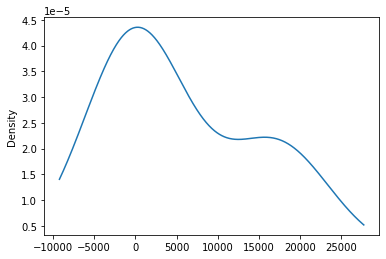

In [12]:
# Visualize the value counts
affiliation_counts.plot.density()

In [13]:
# Print out the CLASSIFICATION value counts
classification_counts = charity_df["CLASSIFICATION"].value_counts()
classification_counts.head(20)

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
C7000      777
C1700      287
C4000      194
C5000      116
C1270      114
C2700      104
C2800       95
C7100       75
C1300       58
C1280       50
C1230       36
C1400       34
C2300       32
C7200       32
C1240       30
Name: CLASSIFICATION, dtype: int64

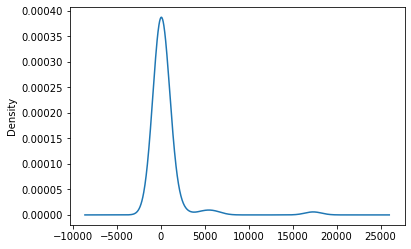

In [14]:
# Visualize the value counts
classification_counts.plot.density()

In [15]:
# Print out the USE_CASE value counts
useCase_counts = charity_df["USE_CASE"].value_counts()
useCase_counts

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

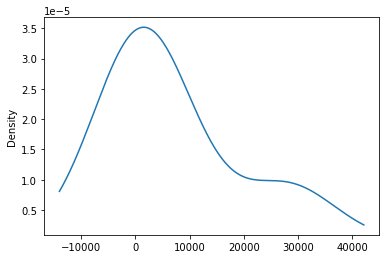

In [16]:
# Visualize the value counts
useCase_counts.plot.density()

In [17]:
# Print out the ORGANIZATION value counts
organization_counts = charity_df["ORGANIZATION"].value_counts()
organization_counts

Trust           23515
Association     10255
Co-operative      486
Corporation        43
Name: ORGANIZATION, dtype: int64

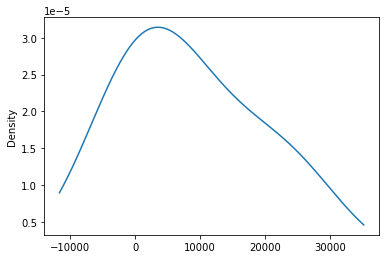

In [18]:
# Visualize the value counts
organization_counts.plot.density()

In [19]:
# Print out the INCOME_AMT value counts
incomeAmt_counts = charity_df["INCOME_AMT"].value_counts()
incomeAmt_counts

0                24388
25000-99999       3747
100000-499999     3374
1M-5M              955
1-9999             728
10000-24999        543
10M-50M            240
5M-10M             185
50M+               139
Name: INCOME_AMT, dtype: int64

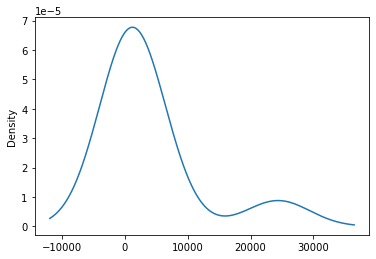

In [20]:
# Visualize the value counts
incomeAmt_counts.plot.density()

In [21]:
# Print out the SPECIAL_CONSIDERATIONS value counts
charity_df["SPECIAL_CONSIDERATIONS"].value_counts()

N    34272
Y       27
Name: SPECIAL_CONSIDERATIONS, dtype: int64

## Preprocess all numerical and categorical variables

## Create a binary classification model that can predict if an Alphabet Soup funded organization will be successful based on the features in the dataset

## Compile, train, and evaluate your binary classification model

## Optimize your model training and input data 